# Project 2 Analysis of Building Electricity Demand


### As you can see, the schema of this data contains the date and time variables and weather conditions as the input (X vector) along with total and HVAC electricity demand (in W) as the target variables (labels).

- #### Office space:
  - Area = 4,982 $m^2$ (53,628 $ft^2$);
  - Number of Stories = 3.
- #### Residential space:
  - Area = 3,135 $m^2$ (33,742 $ft^2$);
  - Number of Stories = 4.
- #### **Assume that the electricity demand is the average hourly demand and it can be interpreted as the hourly consumption in $Wh$.**

## Answer the following questions:

- (each answer needs full explanation and plotting would not suffice):


- Every the same hour
- Time Series
- Clearness Index


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_apt = pd.read_excel("./data/apartment-1.xlsx")
df_ofs = pd.read_excel("./data/office-1.xlsx")

In [3]:
df_ofs

,month,day,hour,Drybulb Temperature,Wetbulb Temperature,Relative Humidity,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand
0,1,1,1,16.0,13.705041,78,0.5,190,0,0.0,33566.91208,8.440094
1,1,1,2,15.6,13.758291,82,2.1,120,0,0.0,33566.91208,8.440094
2,1,1,3,15.1,13.595604,85,2.1,120,0,0.0,33566.91208,8.440094
3,1,1,4,14.8,13.512457,87,2.1,140,0,0.0,33566.91208,8.440094
4,1,1,5,14.4,13.227824,88,1.0,150,0,0.0,33566.91208,8.440094
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,20,17.9,14.182659,67,3.6,290,0,0.0,33566.91208,8.440094
8756,12,31,21,17.5,14.062586,69,3.1,270,0,0.0,33566.91208,8.440094
8757,12,31,22,17.2,14.025331,71,2.6,260,0,0.0,33566.91208,8.440094
8758,12,31,23,16.8,13.889234,73,3.1,260,0,0.0,33566.91208,8.440094


In [4]:
df_apt.describe().T


,count,mean,std,min,25%,50%,75%,max
month,8760.0,6.526027,3.448048,1.000000,4.000000,7.000000,10.000000,12.000000
day,8760.0,15.720548,8.796749,1.000000,8.000000,16.000000,23.000000,31.000000
hour,8760.0,11.500000,6.922582,0.000000,5.750000,11.500000,17.250000,23.000000
Drybulb Temperature,8760.0,27.135297,7.394359,5.000000,21.500000,27.000000,32.500000,47.000000
Wetbulb Temperature,8760.0,20.658828,4.688969,4.999997,17.164419,20.807716,24.236945,30.763584
Relative Humidity,8760.0,60.645320,21.540561,6.000000,44.000000,63.000000,78.000000,100.000000
Wind Speed,8760.0,3.644521,2.252985,0.000000,2.100000,3.100000,5.100000,24.200000
Wind Direction,8760.0,203.729795,111.859837,0.000000,100.000000,200.000000,310.000000,360.000000
Solar Radiation,8760.0,261.977397,343.125973,0.000000,0.000000,0.000000,605.000000,975.000000
Sky Clearness,8760.0,1.814698,2.378669,0.000000,0.000000,0.999997,3.101629,12.558998


In [5]:
df_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  8760 non-null   int64  
 1   day                    8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   Drybulb Temperature    8760 non-null   float64
 4   Wetbulb Temperature    8760 non-null   float64
 5   Relative Humidity      8760 non-null   int64  
 6   Wind Speed             8760 non-null   float64
 7   Wind Direction         8760 non-null   int64  
 8   Solar Radiation        8760 non-null   int64  
 9   Sky Clearness          8760 non-null   float64
 10  Total Electric Demand  8760 non-null   float64
 11  HVAC Electric Demand   8760 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [6]:
df_ofs

,month,day,hour,Drybulb Temperature,Wetbulb Temperature,Relative Humidity,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand
0,1,1,1,16.0,13.705041,78,0.5,190,0,0.0,33566.91208,8.440094
1,1,1,2,15.6,13.758291,82,2.1,120,0,0.0,33566.91208,8.440094
2,1,1,3,15.1,13.595604,85,2.1,120,0,0.0,33566.91208,8.440094
3,1,1,4,14.8,13.512457,87,2.1,140,0,0.0,33566.91208,8.440094
4,1,1,5,14.4,13.227824,88,1.0,150,0,0.0,33566.91208,8.440094
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,20,17.9,14.182659,67,3.6,290,0,0.0,33566.91208,8.440094
8756,12,31,21,17.5,14.062586,69,3.1,270,0,0.0,33566.91208,8.440094
8757,12,31,22,17.2,14.025331,71,2.6,260,0,0.0,33566.91208,8.440094
8758,12,31,23,16.8,13.889234,73,3.1,260,0,0.0,33566.91208,8.440094


In [7]:
df_ofs.columns == df_apt.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [8]:
months = df_ofs['month'].unique()
hours = df_ofs['hour'].unique()
cols = df_ofs.columns


In [9]:
df_ofs.describe().T


,count,mean,std,min,25%,50%,75%,max
month,8760.0,6.526027,3.448048,1.000000,4.000000,7.000000,10.000000,12.000000
day,8760.0,15.720548,8.796749,1.000000,8.000000,16.000000,23.000000,31.000000
hour,8760.0,11.500000,6.922582,0.000000,5.750000,11.500000,17.250000,23.000000
Drybulb Temperature,8760.0,27.135297,7.394359,5.000000,21.500000,27.000000,32.500000,47.000000
Wetbulb Temperature,8760.0,20.658828,4.688969,4.999997,17.164419,20.807716,24.236945,30.763584
Relative Humidity,8760.0,60.645320,21.540561,6.000000,44.000000,63.000000,78.000000,100.000000
Wind Speed,8760.0,3.644521,2.252985,0.000000,2.100000,3.100000,5.100000,24.200000
Wind Direction,8760.0,203.729795,111.859837,0.000000,100.000000,200.000000,310.000000,360.000000
Solar Radiation,8760.0,261.977397,343.125973,0.000000,0.000000,0.000000,605.000000,975.000000
Sky Clearness,8760.0,1.814698,2.378669,0.000000,0.000000,0.999997,3.101629,12.558998


In [10]:
df_ofs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  8760 non-null   int64  
 1   day                    8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   Drybulb Temperature    8760 non-null   float64
 4   Wetbulb Temperature    8760 non-null   float64
 5   Relative Humidity      8760 non-null   int64  
 6   Wind Speed             8760 non-null   float64
 7   Wind Direction         8760 non-null   int64  
 8   Solar Radiation        8760 non-null   int64  
 9   Sky Clearness          8760 non-null   float64
 10  Total Electric Demand  8760 non-null   float64
 11  HVAC Electric Demand   8760 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [11]:
8760/365

24.0

In [12]:
len(df_apt[df_apt.isna().any(axis=1)])

0

In [13]:
len(df_apt[df_apt.duplicated()])

0

In [14]:
len(df_ofs[df_ofs.isna().any(axis=1)])


0

In [15]:
len(df_ofs[df_ofs.duplicated()])


0

In [16]:
for col in cols:
    print(
        f"Number of unique values in column “{col}”: {df_apt[col].nunique()}")
    if df_ofs[col].nunique() < 20:
        print(f"And the {col} values: {df_apt[col].unique()}.\n")

Number of unique values in column “month”: 12
And the month values: [ 1  2  3  4  5  6  7  8  9 10 11 12].

Number of unique values in column “day”: 31
Number of unique values in column “hour”: 24
Number of unique values in column “Drybulb Temperature”: 343
Number of unique values in column “Wetbulb Temperature”: 7015
Number of unique values in column “Relative Humidity”: 95
Number of unique values in column “Wind Speed”: 105
Number of unique values in column “Wind Direction”: 53
Number of unique values in column “Solar Radiation”: 913
Number of unique values in column “Sky Clearness”: 4355
Number of unique values in column “Total Electric Demand”: 40
Number of unique values in column “HVAC Electric Demand”: 8760


In [17]:
for col in cols:
    print(
        f"Number of unique values in column “{col}”: {df_ofs[col].nunique()}")
    if df_ofs[col].nunique() < 20:
        print(f"And the {col} values: {df_ofs[col].unique()}.\n")


Number of unique values in column “month”: 12
And the month values: [ 1  2  3  4  5  6  7  8  9 10 11 12].

Number of unique values in column “day”: 31
Number of unique values in column “hour”: 24
Number of unique values in column “Drybulb Temperature”: 343
Number of unique values in column “Wetbulb Temperature”: 7015
Number of unique values in column “Relative Humidity”: 95
Number of unique values in column “Wind Speed”: 105
Number of unique values in column “Wind Direction”: 53
Number of unique values in column “Solar Radiation”: 913
Number of unique values in column “Sky Clearness”: 4355
Number of unique values in column “Total Electric Demand”: 32
Number of unique values in column “HVAC Electric Demand”: 5855


#### Main differences


In [18]:
diff = df_ofs.compare(df_apt)
diff

Total Electric Demand              HVAC Electric Demand             
                      self        other                 self        other
0              33566.91208  15711.87874             8.440094  2564.336701
1              33566.91208  15123.15413             8.440094  1954.418025
2              33566.91208  14828.79182             8.440094  1600.689937
3              33566.91208  14681.61067             8.440094  1385.728476
4              33566.91208  16758.10411             8.440094  1245.539726
...                    ...          ...                  ...          ...
8755           33566.91208  38150.57785             8.440094  5645.494442
8756           33566.91208  37710.45695             8.440094  5061.279263
8757           33566.91208  32246.95593             8.440094  4435.611816
8758           33566.91208  25311.64337             8.440094  3394.955401
8759           33566.91208  19415.13430             8.440094  2505.025214

[8760 rows x 4 columns]

## 1- Compare the total and HVAC electricity consumption of the two buildings on a monthly and annual basis.

- (a bar chart is preferred)


In [19]:
dfs = [df_apt,df_ofs]
demands = ['HVAC Electric Demand', 'Total Electric Demand']
area_labels = ['Residential space','Office space']

In [20]:
# Annual
apt_consumption, ofs_consumption =[ [
    df[_].sum()/1e6 for _ in demands] for df in dfs
] 
# Monthly
apt_month_consumption,ofs_month_consumption =  [[[df.query(f"month == {_}")[demand].sum()/1000 for _ in months] for demand in demands] for df in dfs] 

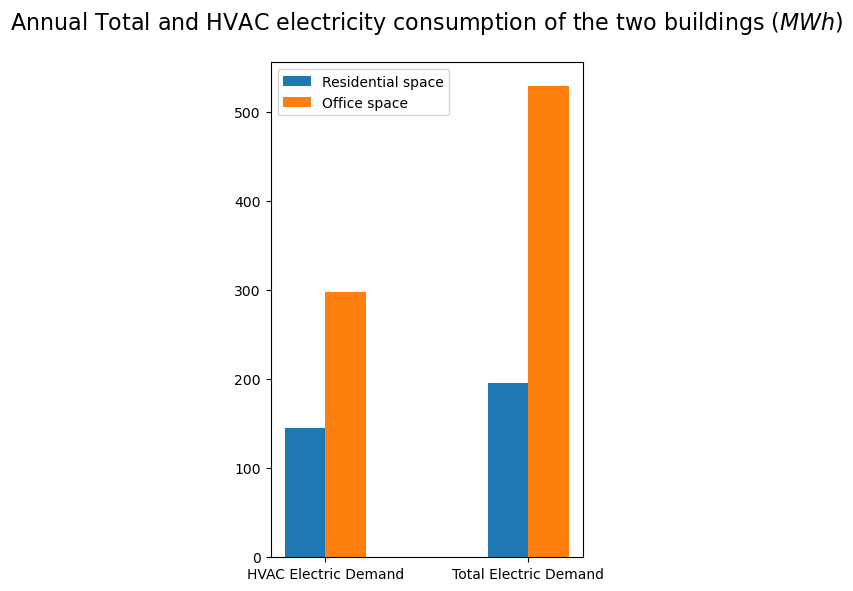

In [21]:
xs = np.arange(2)

_, ax = plt.subplots(figsize=(4, 6))

ax.bar(xs - 0.1, apt_consumption, width=0.2)
ax.bar(xs + 0.1, ofs_consumption, width=0.2)
ax.set_xticks(xs,labels=demands)
ax.set_title(
    "Annual Total and HVAC electricity consumption of the two buildings ($MWh$)",fontsize=16,y=1.05)

plt.legend(area_labels)
plt.tight_layout()
plt.show()


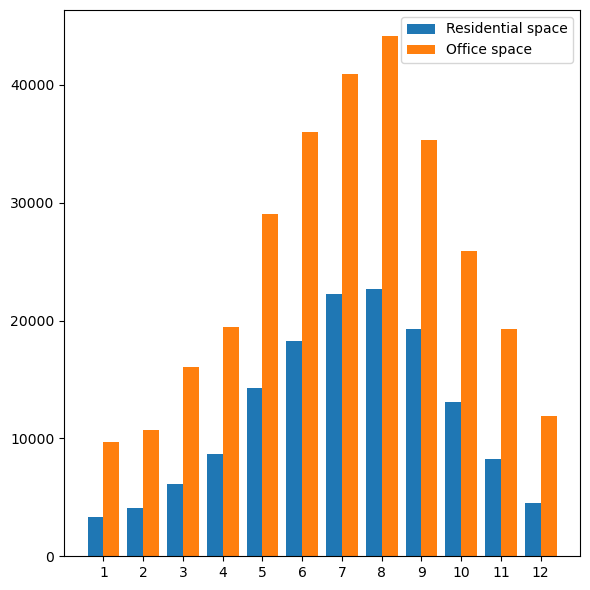

In [22]:
xs = np.arange(12)

_, ax = plt.subplots(figsize=(6, 6))

ax.bar(xs - 0.2, apt_month_consumption[0], width=0.4)
ax.bar(xs + 0.2, ofs_month_consumption[0], width=0.4)
ax.set_xticks(xs, labels=months)
# ax.set_title(
#     "Monthly HVAC electricity consumption of the two buildings ($kWh$)", fontsize=16, y=1.05)
plt.tight_layout()
plt.legend(area_labels)

plt.show()


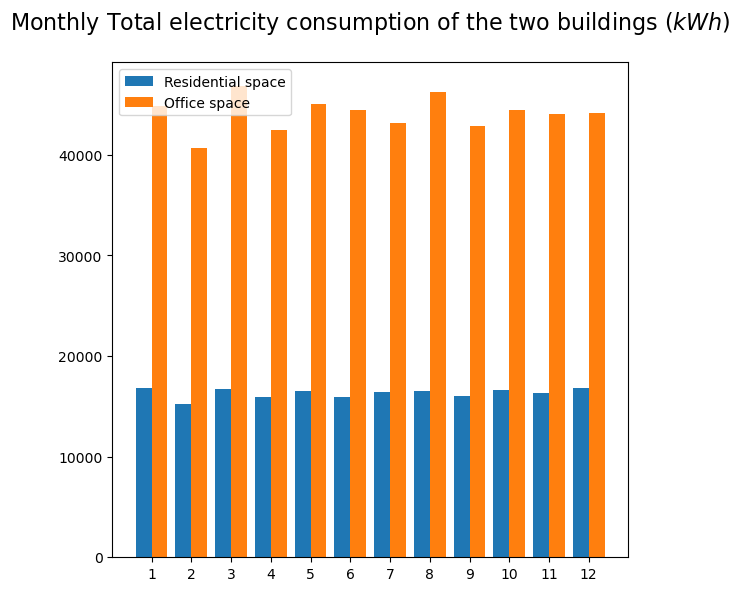

In [23]:
xs = np.arange(12)

_, ax = plt.subplots(figsize=(6, 6))

ax.bar(xs - 0.2, apt_month_consumption[1], width=0.4)
ax.bar(xs + 0.2, ofs_month_consumption[1], width=0.4)
ax.set_xticks(xs, labels=months)

ax.set_title(
    "Monthly Total electricity consumption of the two buildings ($kWh$)", fontsize=16, y=1.05)
plt.legend(area_labels)
plt.tight_layout()
plt.show()


## 2- Plot and describe the distribution of the weather data.

#### Assuming the three-month seasons are defined as follows: winter (December, January, February), spring (March, April, May), summer (June, July, August), and fall (September, October, November)


### In that the weather data of the two are all the same, considering df_apt dataset only


### Temperature and Wet Depression


In [24]:
df_apt['Wetbulb Depression'] = df_apt['Drybulb Temperature'] - df_apt['Wetbulb Temperature']


In [25]:
cols_temperature = ['Drybulb Temperature',
                    'Wetbulb Temperature', 'Wetbulb Depression']


In [26]:
cols = ['month', 'day', 'hour', 'Drybulb Temperature', 'Wetbulb Temperature', 'Wetbulb Depression', 'Relative Humidity',
        'Wind Speed', 'Wind Direction', 'Solar Radiation', 'Sky Clearness', 'Total Electric Demand', 'HVAC Electric Demand']

df_apt = df_apt.reindex(columns=cols)

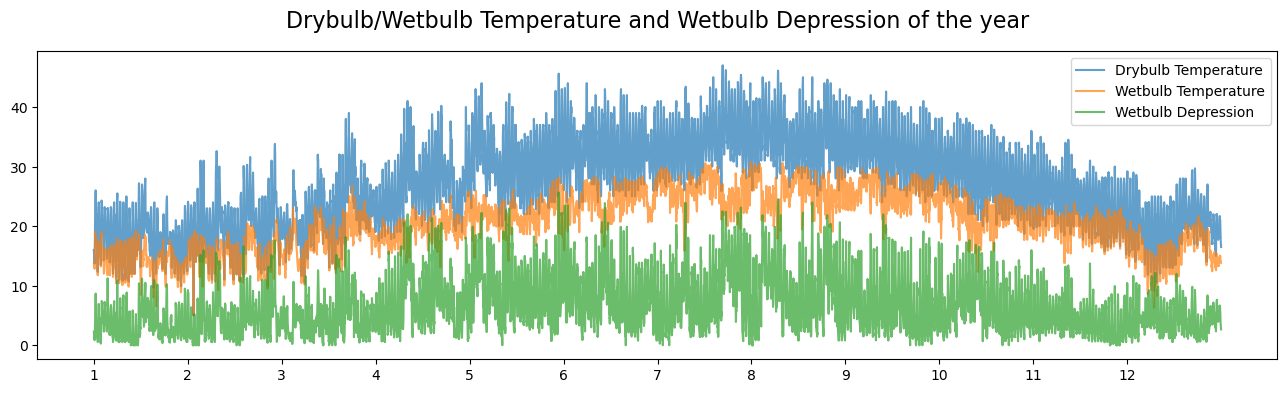

In [33]:
_, ax = plt.subplots(figsize=(16, 4))

df_apt[cols_temperature].plot(ax=ax, alpha=0.7)

ax.set_xticks(np.arange(0, len(df_apt), len(df_apt) // 12))
ax.set_xticklabels(months)
ax.set_title("Drybulb/Wetbulb Temperature and Wetbulb Depression of the year", fontsize=16, y=1.05)
plt.legend(cols_temperature)
plt.show()

In [ ]:
# ['Drybulb Temperature', 'Wetbulb Temperature', 'Wetbulb Depression', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Solar Radiation', 'Sky Clearness']

In [47]:
# monthly_dryTemp = df_apt.groupby('month')['Drybulb Temperature'].mean()
# monthly_dryTemp_var = df_apt.groupby('month')['Drybulb Temperature'].var()
# monthly_wetTemp = df_apt.groupby('month')['Wetbulb Temperature'].mean()
# monthly_wetTemp_var = df_apt.groupby('month')['Wetbulb Temperature'].var()


In [702]:
monthly_weather_data = df_apt.groupby('month')[['Drybulb Temperature', 'Wetbulb Temperature', 'Wetbulb Depression', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Solar Radiation', 'Sky Clearness']].agg(['mean','var'])

In [703]:
monthly_weather_data


Drybulb Temperature            Wetbulb Temperature             
                     mean        var                mean       var   
month                                                                
1               18.005511  15.036645           14.375887  4.685296  \
2               19.938244  24.540756           15.170202  5.827006   
3               22.243145  24.015135           17.927142  8.973786   
4               26.535833  24.628839           19.249957  3.363069   
5               30.813575  26.438322           21.837704  4.588757   
6               32.813472  22.508177           24.050388  6.033693   
7               34.448253  21.477332           25.783273  7.165135   
8               34.801075  21.165544           25.707728  7.390193   
9               32.550833  18.297885           25.648517  4.494337   
10              28.571909  20.080435           21.928455  6.854747   
11              24.353056  16.189643           20.138322  2.967933   
12              20.100941  15.851453           15.765333  7.445527   

      Wetbulb Depression            Relative Humidity             Wind Speed   
                    mean        var              mean         var       mean   
month                                                                          
1               3.629624   7.246946         70.446237  334.010565   3.042204  \
2               4.768042  14.165634         64.837798  472.940864   3.452232   
3               4.316003  10.737978         69.004032  344.227440   3.889113   
4               7.285876  22.736297         55.019444  462.873057   3.810000   
5               8.975871  26.176936         49.922043  434.569958   4.213038   
6               8.763085  26.796186         52.616667  422.553825   4.152222   
7               8.664980  31.569257         54.911290  521.830613   3.608468   
8               9.093347  31.928756         53.077957  522.241559   3.702554   
9               6.902317  24.660226         61.887500  482.876061   3.711667   
10              6.643454  17.616465         59.493280  408.675594   3.494355   
11              4.214733   9.063393         70.872222  288.765291   2.989583   
12              4.335608   6.639722         65.990591  260.318888   3.652957   

                Wind Direction               Solar Radiation                  
            var           mean           var            mean            var   
month                                                                         
1      5.403869     207.162634   9955.186166      227.466398  110157.016366  \
2      4.077014     194.122024  12209.064075      276.962798  132624.474024   
3      5.536019     199.274194  13417.507489      216.727151  103197.805668   
4      6.549246     207.500000  14634.353268      240.891667  111698.155146   
5      6.623827     225.580645  11826.881778      303.887097  125850.754396   
6      6.699355     232.833333  10129.652295      310.769444  128419.604628   
7      4.843441     215.360215  11053.307486      272.725806  110159.736291   
8      4.654435     198.215054  12432.373609      280.979839  117502.178597   
9      4.098223     174.405556  13589.443085      279.686111  123883.119696   
10     3.640399     169.099462  13925.567483      273.150538  123886.017685   
11     2.868640     219.236111  11513.880196      246.594444  113788.611374   
12     4.388363     201.653226  11748.945535      216.306452  103898.016324   

      Sky Clearness            
               mean       var  
month                          
1          1.615682  5.111165  
2          2.020222  7.552799  
3          1.575482  5.495402  
4          1.729036  5.479477  
5          2.034024  5.856054  
6          2.137358  6.283420  
7          1.783754  4.605053  
8          1.866188  5.032258  
9          1.914491  5.808619  
10         1.868270  5.812045  
11         1.735474  5.917073  
12         1.524589  4.840613

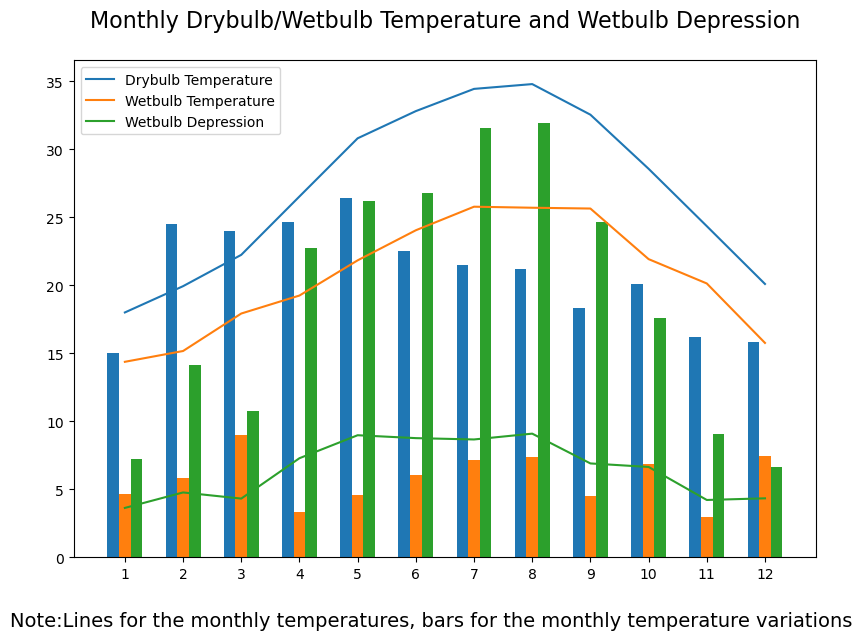

In [721]:
_, ax = plt.subplots(figsize=(8, 6))

for col,tick in zip(cols_temperature,[-0.2,0,0.2]):
    ax.plot(monthly_weather_data[col]['mean'])
    ax.bar(months + tick,
              monthly_weather_data[col]['var'], width=0.2)

ax.set_xticks(months, labels=months)
ax.set_title(
    "Monthly Drybulb/Wetbulb Temperature and Wetbulb Depression", fontsize=16, y=1.05)

plt.tight_layout()
plt.legend(cols_temperature)
plt.figtext(0.5, -0.05, 'Note:Lines for the monthly temperatures, bars for the monthly temperature variations', ha='center', fontsize=14)
plt.show()

In [722]:
monthly_weather_data['Relative Humidity']['mean']

month
1     70.446237
2     64.837798
3     69.004032
4     55.019444
5     49.922043
6     52.616667
7     54.911290
8     53.077957
9     61.887500
10    59.493280
11    70.872222
12    65.990591
Name: mean, dtype: float64

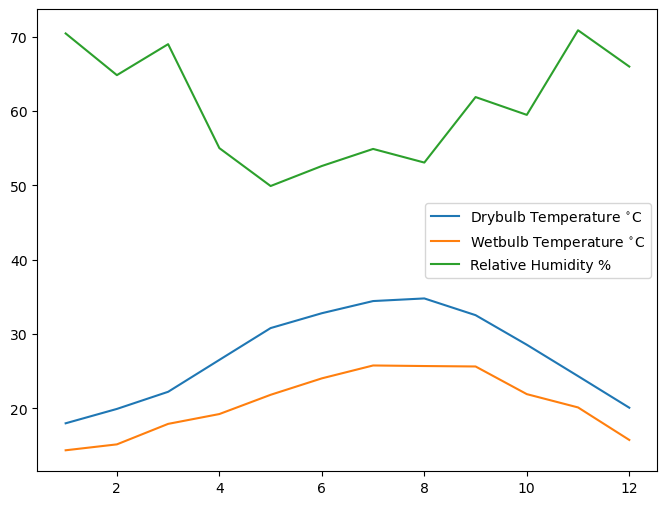

In [732]:
_, ax = plt.subplots(figsize=(8, 6))

for col in ['Drybulb Temperature', 'Wetbulb Temperature', 'Relative Humidity']:
     ax.plot(monthly_weather_data[col]['mean'])
     

plt.legend(['Drybulb Temperature $^{\circ}$C',
           'Wetbulb Temperature $^{\circ}$C', 'Relative Humidity %'])
plt.show()


In [ ]:
# VAr

In [ ]:
cols = ['month', 'day', 'hour', 'Drybulb Temperature', 'Wetbulb Temperature', 'Wetbulb Depression', 'Relative Humidity',
        'Wind Speed', 'Wind Direction', 'Solar Radiation', 'Sky Clearness', 'Total Electric Demand', 'HVAC Electric Demand']


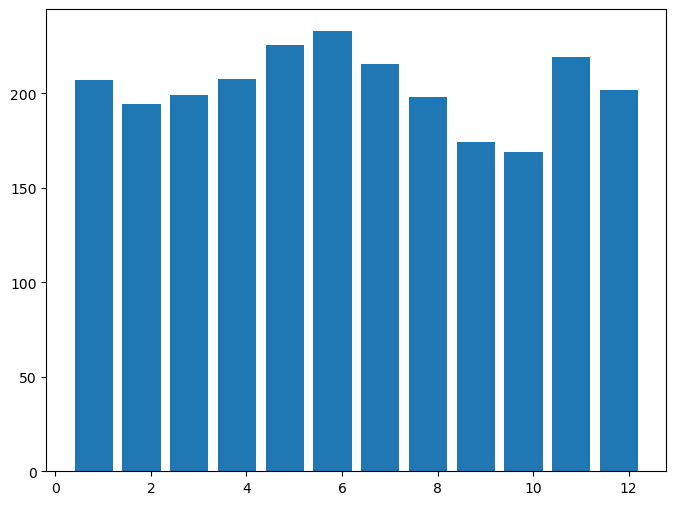

In [742]:
_, ax = plt.subplots(figsize=(8, 6))

# for col in ['Wind Speed', 'Wind Direction']:
ax.bar(months-0.2,monthly_weather_data['Wind Direction']['mean'])
# ax.bar(months+0.2,monthly_weather_data['Wind Direction']['var'])



# plt.legend(['Wind Speed', 'Wind Direction'])
plt.show()


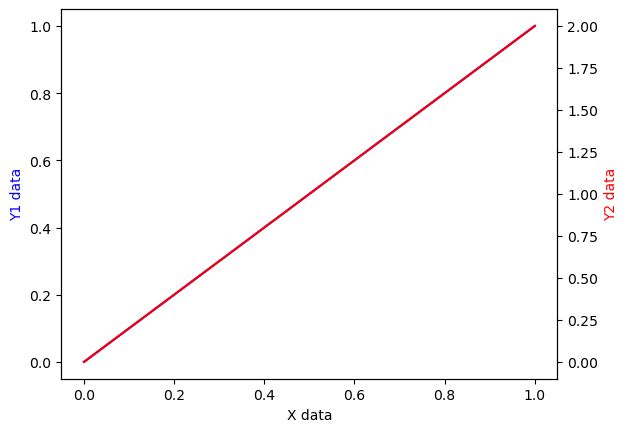

In [744]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot([0, 1], [0, 1], 'b-')
ax2.plot([0, 1], [0, 2], 'r-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='b')
ax2.set_ylabel('Y2 data', color='r')

plt.show()


#### Wind


In [ ]:
monthly_windSpd_apt,monthly_windSpd_ofs=[[df.query(f'month == {_}')['Wind Speed'].mean() for _ in months] for df in dfs]

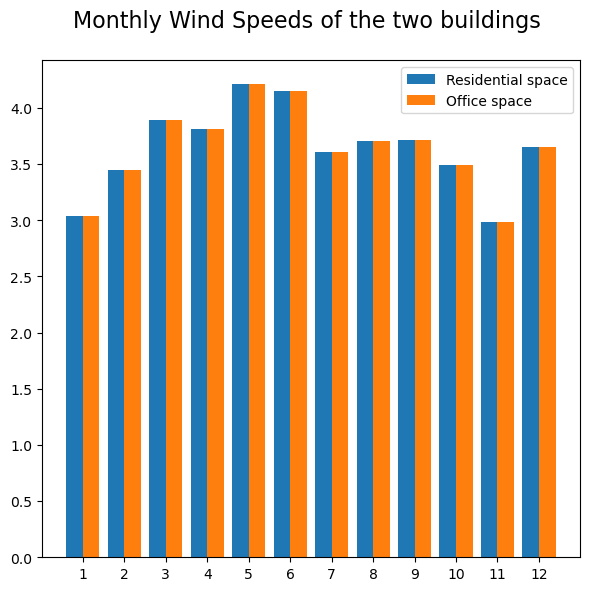

In [ ]:
xs = np.arange(12)

_, ax = plt.subplots(figsize=(6, 6))

ax.bar(xs - 0.2, monthly_windSpd_apt, width=0.4)
ax.bar(xs + 0.2, monthly_windSpd_ofs, width=0.4)
ax.set_xticks(xs, labels=months)
ax.set_title(
    "Monthly Wind Speeds of the two buildings ", fontsize=16, y=1.05)
plt.tight_layout()
plt.legend(area_labels)

plt.show()

In [ ]:
monthly_windDir_apt,monthly_windDir_ofs=[[df.query(f'month == {_}')['Wind Direction'].mean() for _ in months] for df in dfs]

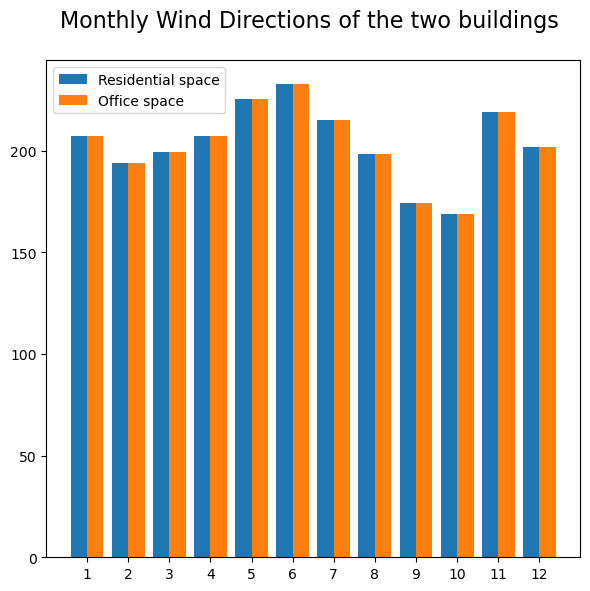

In [ ]:
xs = np.arange(12)

_, ax = plt.subplots(figsize=(6, 6))

ax.bar(xs - 0.2, monthly_windDir_apt, width=0.4)
ax.bar(xs + 0.2, monthly_windDir_ofs, width=0.4)
ax.set_xticks(xs, labels=months)
ax.set_title(
    "Monthly Wind Directions of the two buildings ", fontsize=16, y=1.05)
plt.tight_layout()
plt.legend(area_labels)

plt.show()

### Solar and sky


In [ ]:
monthly_solar_apt,monthly_solar_ofs=[[df.query(f'month == {_}')['Solar Radiation'].mean() for _ in months] for df in dfs]

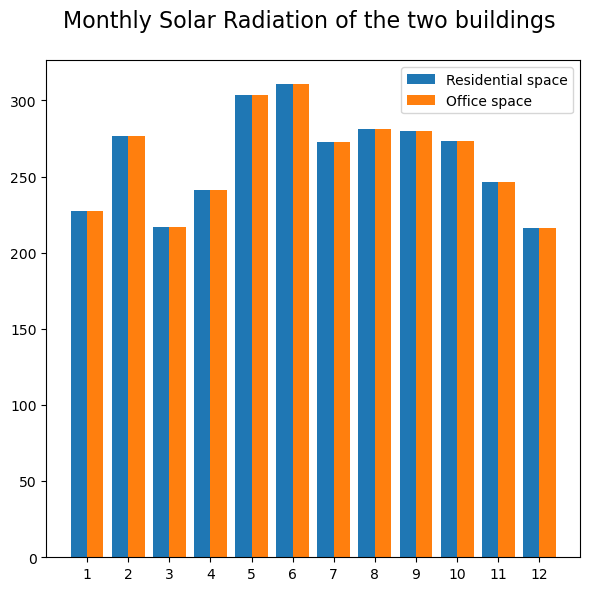

In [ ]:
xs = np.arange(12)

_, ax = plt.subplots(figsize=(6, 6))

ax.bar(xs - 0.2, monthly_solar_apt, width=0.4)
ax.bar(xs + 0.2, monthly_solar_ofs, width=0.4)
ax.set_xticks(xs, labels=months)
ax.set_title(
    "Monthly Solar Radiation of the two buildings ", fontsize=16, y=1.05)
plt.tight_layout()
plt.legend(area_labels)

plt.show()

In [ ]:
monthly_sky_apt,monthly_sky_ofs=[[df.query(f'month == {_}')['Sky Clearness'].mean() for _ in months] for df in dfs]

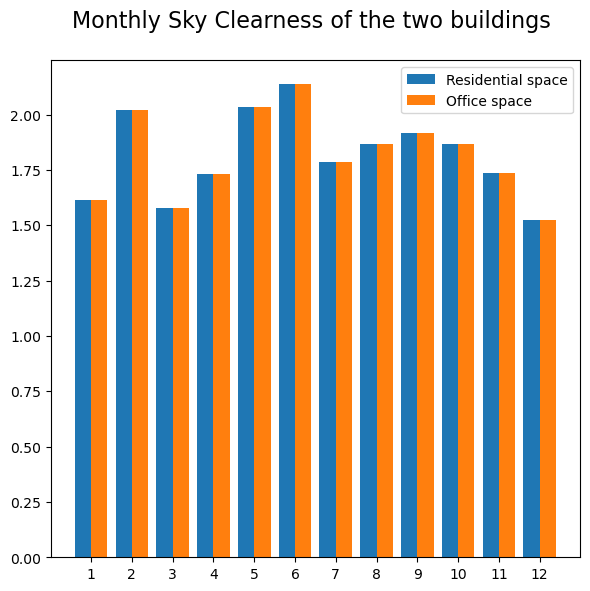

In [ ]:
xs = np.arange(12)

_, ax = plt.subplots(figsize=(6, 6))

ax.bar(xs - 0.2, monthly_sky_apt, width=0.4)
ax.bar(xs + 0.2, monthly_sky_ofs, width=0.4)
ax.set_xticks(xs, labels=months)
ax.set_title(
    "Monthly Sky Clearness of the two buildings ", fontsize=16, y=1.05)
plt.tight_layout()
plt.legend(area_labels)

plt.show()

### 3- Report the correlations between weather conditions and HVAC demand for each building.


In [ ]:
import seaborn as sns

In [ ]:
corr_matrix_HVAC_apt = df_apt[['HVAC Electric Demand','Drybulb Temperature', 'Wetbulb Temperature', 'Wetbulb Depression', 'Relative Humidity',
                         'Wind Speed', 'Wind Direction', 'Solar Radiation', 'Sky Clearness']].corr()


In [ ]:
corr_matrix_HVAC_apt

,HVAC Electric Demand,Drybulb Temperature,Wetbulb Temperature,Wetbulb Depression,Relative Humidity,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness
HVAC Electric Demand,1.000000,0.935065,0.847445,0.609869,-0.495784,0.301006,0.224513,0.324191,0.300573
Drybulb Temperature,0.935065,1.000000,0.770289,0.784484,-0.687426,0.354979,0.215812,0.478109,0.449311
Wetbulb Temperature,0.847445,0.770289,1.000000,0.208814,-0.094382,0.104036,0.106345,0.080457,0.070379
Wetbulb Depression,0.609869,0.784484,0.208814,1.000000,-0.962437,0.443215,0.227545,0.654975,0.620612
Relative Humidity,-0.495784,-0.687426,-0.094382,-0.962437,1.000000,-0.480434,-0.250351,-0.655690,-0.622859
Wind Speed,0.301006,0.354979,0.104036,0.443215,-0.480434,1.000000,0.340284,0.336292,0.320178
Wind Direction,0.224513,0.215812,0.106345,0.227545,-0.250351,0.340284,1.000000,0.288936,0.286058
Solar Radiation,0.324191,0.478109,0.080457,0.654975,-0.655690,0.336292,0.288936,1.000000,0.964087
Sky Clearness,0.300573,0.449311,0.070379,0.620612,-0.622859,0.320178,0.286058,0.964087,1.000000


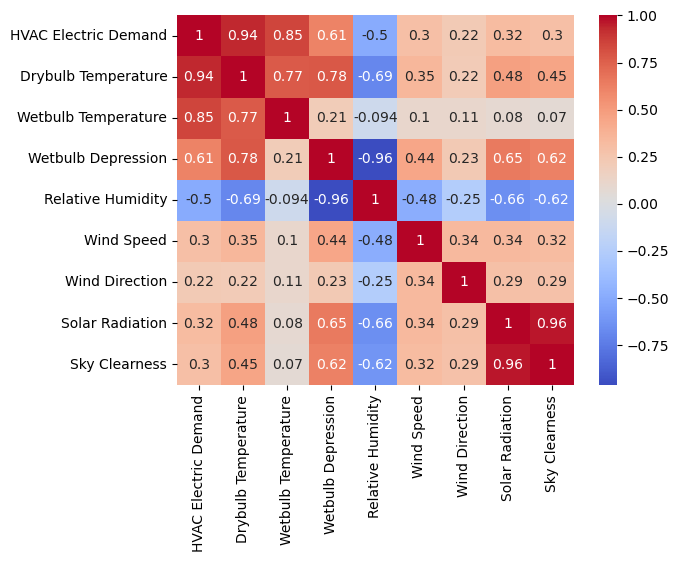

In [ ]:
sns.heatmap(corr_matrix_HVAC_apt, annot=True, cmap='coolwarm')
plt.show()


### 4- Create a scatter plot of the weather conditions vs HVAC demand and explain what you can learn from these associations for each building.


In [ ]:
from pandas.plotting import scatter_matrix


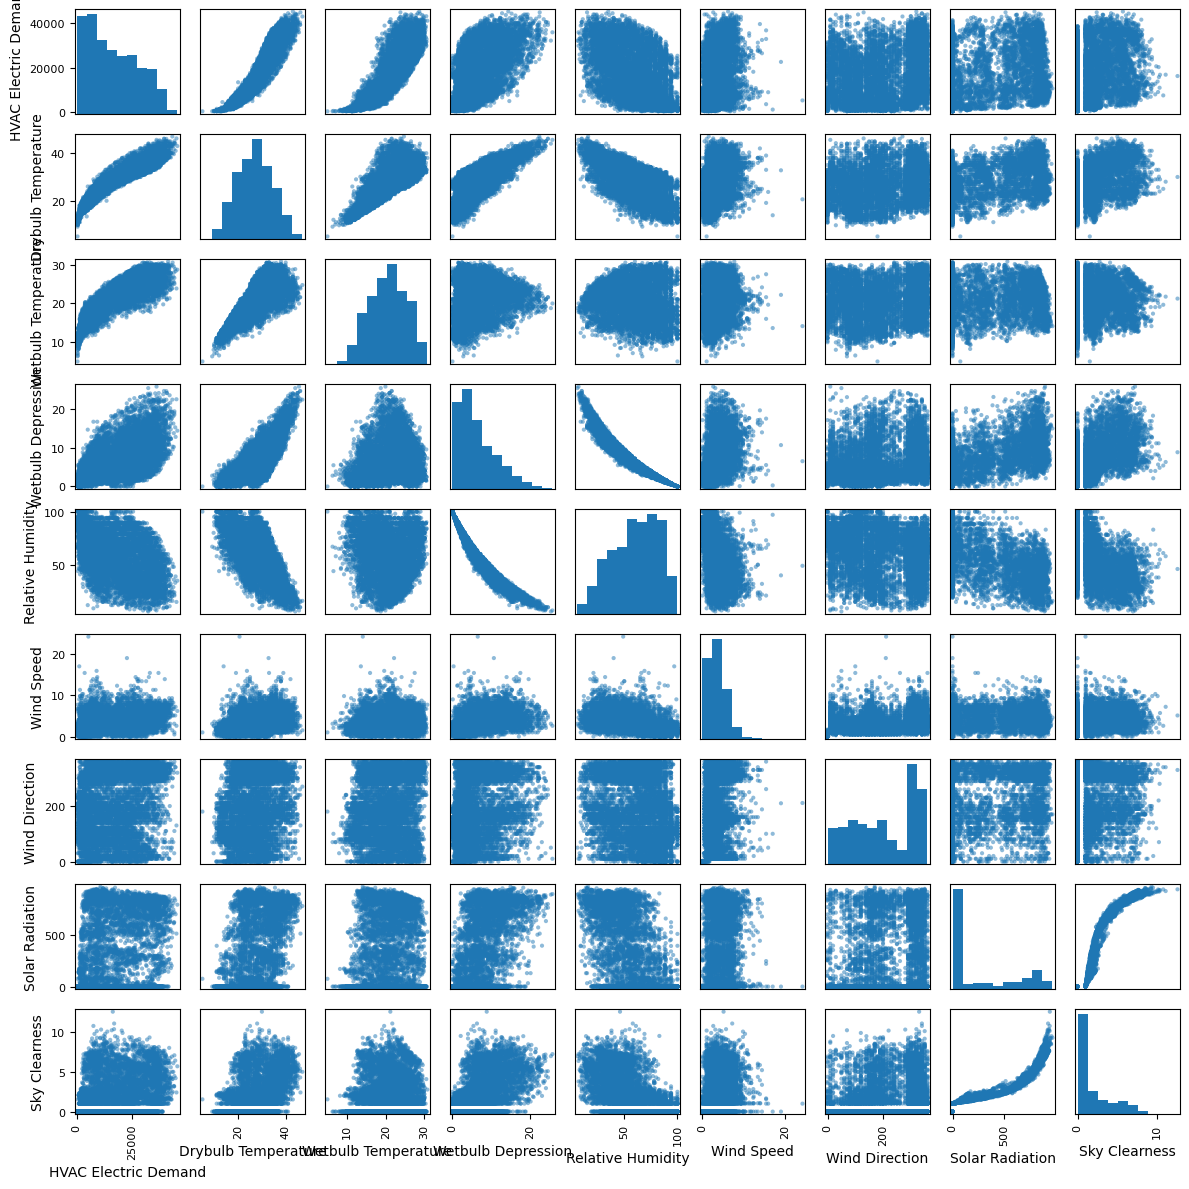

In [ ]:
scatter_matrix(df_apt[['HVAC Electric Demand','Drybulb Temperature', 'Wetbulb Temperature', 'Wetbulb Depression', 'Relative Humidity',
                         'Wind Speed', 'Wind Direction', 'Solar Radiation', 'Sky Clearness']], figsize=(12, 12))
plt.tight_layout()
plt.show()


### 5- Split the data into training and test with a ratio of 0.2 as the test data.


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
apt_train_set, apt_test_set = train_test_split(df_apt, test_size=0.2, random_state=42)


In [ ]:
apt_train_set

,month,day,hour,Drybulb Temperature,Wetbulb Temperature,Wetbulb Depression,Relative Humidity,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand
8415,12,17,16,27.0,15.809509,11.190491,30,1.5,190,712,4.437012,16820.96247,11701.926620
5049,7,30,10,39.2,22.344758,16.855242,23,4.1,150,624,3.077119,16044.67763,30615.279060
8395,12,16,20,19.0,16.497794,2.502206,78,2.1,60,0,0.000000,38150.57785,7532.528875
1535,3,5,0,17.3,16.022137,1.277863,88,6.5,80,0,0.000000,19415.13430,2164.094159
5518,8,18,23,31.0,28.645840,2.354160,84,2.1,60,0,0.000000,19415.13430,29339.250350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,8,27,23,34.0,25.883462,8.116538,53,3.6,30,0,0.000000,19415.13430,30349.611230
5191,8,5,8,36.0,22.918571,13.081429,33,2.1,60,250,1.636380,21784.93617,26691.115130
5390,8,13,15,37.0,27.750904,9.249096,50,7.2,320,796,5.553459,16820.96247,34852.133130
860,2,5,21,19.0,17.088223,1.911777,83,2.6,320,0,0.000000,37710.45695,8301.146763


### 6- Create a linear regression model and train it based on the training data using weather conditions as the feature set and HVAC demand as the label for each building.

- ### Before training, do not forget to standardize your input.
- ### Report the MSE value for the training and test data for both buildings.


### Apt LinR


In [ ]:
y = apt_train_set.pop('HVAC Electric Demand')
X = apt_train_set


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.58718539,  0.14418918,  0.65114986, ...,  1.30081093,
         1.08809622, -0.7644247 ],
       [ 0.13532469,  1.62000212, -0.21771119, ...,  1.04524704,
         0.5198727 , -0.87103494],
       [ 1.58718539,  0.03066511,  1.23039055, ..., -0.76693327,
        -0.76588453,  2.16485487],
       ...,
       [ 0.42569683, -0.30990711,  0.50633968, ...,  1.54475828,
         1.55459752, -0.7644247 ],
       [-1.31653601, -1.21809969,  1.37520073, ..., -0.76693327,
        -0.76588453,  2.10441135],
       [ 1.00644111,  1.62000212,  1.66482108, ..., -0.76693327,
        -0.76588453, -0.40815693]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled,y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
y_predicted = lin_reg.predict(X_scaled)
lin_mse = mean_squared_error(y, y_predicted)
lin_rmse = np.sqrt(lin_mse)


In [ ]:
lin_rmse


2770.652068753038

In [ ]:
y_test = apt_test_set.pop('HVAC Electric Demand')
X_test = apt_test_set

In [ ]:
X_test_scale = scaler.transform(X_test)
y_predicted_test = lin_reg.predict(X_test_scale)
lin_mse_test = mean_squared_error(y_test, y_predicted_test)
lin_rmse_test = np.sqrt(lin_mse_test)


In [ ]:
lin_rmse_test


2755.7591355307713

### 7- Incorporate the role of season and time of day into your regression model by introducing two sets of categorical variables:

- ### First, explain how to add categorical variables into a regression model through OneHotEncoder in sklearn and what OneHotEncoder is (we did not cover this in our lecture and this is defined as an assignment for you.)
- ### Second, use OneHotEncoder object and transform 'month' column and concatenate it to your weather conditions input.
- ### Third, use pandas map method and convert the 'hour' column values as follows:
  - #### {0,1,2,3,4,5}-->value=0
  - #### {6,7,8,9}-->value=1
  - #### {10,11,12}-->value=2
  - #### {13,14,15,16}-->value=3
  - #### {17,18,19}-->value=4
  - #### {20,21,22,23}-->value=5
- ### Fourth, apply OneHotEncoder on this new column and concatenate it to your input.


In [ ]:
df_apt

,month,day,hour,Drybulb Temperature,Wetbulb Temperature,Wetbulb Depression,Relative Humidity,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand
0,1,1,1,16.0,13.705041,2.294959,78,0.5,190,0,0.0,15711.87874,2564.336701
1,1,1,2,15.6,13.758291,1.841709,82,2.1,120,0,0.0,15123.15413,1954.418025
2,1,1,3,15.1,13.595604,1.504396,85,2.1,120,0,0.0,14828.79182,1600.689937
3,1,1,4,14.8,13.512457,1.287543,87,2.1,140,0,0.0,14681.61067,1385.728476
4,1,1,5,14.4,13.227824,1.172176,88,1.0,150,0,0.0,16758.10411,1245.539726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,20,17.9,14.182659,3.717341,67,3.6,290,0,0.0,38150.57785,5645.494442
8756,12,31,21,17.5,14.062586,3.437414,69,3.1,270,0,0.0,37710.45695,5061.279263
8757,12,31,22,17.2,14.025331,3.174669,71,2.6,260,0,0.0,32246.95593,4435.611816
8758,12,31,23,16.8,13.889234,2.910766,73,3.1,260,0,0.0,25311.64337,3394.955401


#### The three-month seasons are defined as follows: winter (December, January, February), spring (March, April, May), summer (June, July, August), and fall (September, October, November)


In [ ]:
def label_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Fall'
    else:
        return 'Winter'

In [ ]:
df_apt['season'] = df_apt['month'].apply(label_season)

In [ ]:
df_apt

,month,day,hour,Drybulb Temperature,Wetbulb Temperature,Wetbulb Depression,Relative Humidity,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand,season
0,1,1,1,16.0,13.705041,2.294959,78,0.5,190,0,0.0,15711.87874,2564.336701,Winter
1,1,1,2,15.6,13.758291,1.841709,82,2.1,120,0,0.0,15123.15413,1954.418025,Winter
2,1,1,3,15.1,13.595604,1.504396,85,2.1,120,0,0.0,14828.79182,1600.689937,Winter
3,1,1,4,14.8,13.512457,1.287543,87,2.1,140,0,0.0,14681.61067,1385.728476,Winter
4,1,1,5,14.4,13.227824,1.172176,88,1.0,150,0,0.0,16758.10411,1245.539726,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,20,17.9,14.182659,3.717341,67,3.6,290,0,0.0,38150.57785,5645.494442,Winter
8756,12,31,21,17.5,14.062586,3.437414,69,3.1,270,0,0.0,37710.45695,5061.279263,Winter
8757,12,31,22,17.2,14.025331,3.174669,71,2.6,260,0,0.0,32246.95593,4435.611816,Winter
8758,12,31,23,16.8,13.889234,2.910766,73,3.1,260,0,0.0,25311.64337,3394.955401,Winter


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()


In [ ]:
df_seasons_cat_Apt = df_apt[['season']]

In [ ]:
df_seasons_cat_Apt

,season
0,Winter
1,Winter
2,Winter
3,Winter
4,Winter
...,...
8755,Winter
8756,Winter
8757,Winter
8758,Winter


In [ ]:
df_seasons_cat_1hot_Apt = cat_encoder.fit_transform(df_seasons_cat_Apt)

In [ ]:
df_seasons_cat_1hot_Apt = pd.DataFrame(df_seasons_cat_1hot_Apt.toarray())

In [ ]:
df_seasons_cat_1hot_Apt

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
8755,0.0,0.0,0.0,1.0
8756,0.0,0.0,0.0,1.0
8757,0.0,0.0,0.0,1.0
8758,0.0,0.0,0.0,1.0


In [ ]:
def label_hours(hour):
    if hour in [0,1,2,3,4,5]:
        return 0
    elif hour in [6,7,8,9]:
        return 1
    elif hour in [10,11,12]:
        return 2
    elif hour in [13,14,15,16]:
        return 3
    elif hour in [17,18,19]:
        return 4
    else:
        return 5

In [ ]:
df_apt['day period'] = df['hour'].map(label_hours)

In [ ]:
df_apt = pd.concat([df_apt,df_seasons_cat_1hot_Apt],axis=1)

In [ ]:
df_apt.columns

Index([                'month',                   'day',
                        'hour',   'Drybulb Temperature',
         'Wetbulb Temperature',    'Wetbulb Depression',
           'Relative Humidity',            'Wind Speed',
              'Wind Direction',       'Solar Radiation',
               'Sky Clearness', 'Total Electric Demand',
        'HVAC Electric Demand',                'season',
                  'day period',                       0,
                             1,                       2,
                             3],
      dtype='object')

In [ ]:
cols = [              'season',    0,
                             1,                       2,
                             3,'month',                   'day',
                        'hour', 'day period',  'Drybulb Temperature',
         'Wetbulb Temperature',    'Wetbulb Depression',
           'Relative Humidity',            'Wind Speed',
              'Wind Direction',       'Solar Radiation',
               'Sky Clearness', 'Total Electric Demand',
        'HVAC Electric Demand'                
                                     ]

In [ ]:
df_apt = df_apt.reindex(columns=cols)

In [ ]:
df_apt.describe().T


,count,mean,std,min,25%,50%,75%,max
0,8760.0,0.249315,0.432641,0.000000,0.000000,0.000000,0.000000,1.000000
1,8760.0,0.252055,0.434217,0.000000,0.000000,0.000000,1.000000,1.000000
2,8760.0,0.252055,0.434217,0.000000,0.000000,0.000000,1.000000,1.000000
3,8760.0,0.246575,0.431042,0.000000,0.000000,0.000000,0.000000,1.000000
month,8760.0,6.526027,3.448048,1.000000,4.000000,7.000000,10.000000,12.000000
day,8760.0,15.720548,8.796749,1.000000,8.000000,16.000000,23.000000,31.000000
hour,8760.0,11.500000,6.922582,0.000000,5.750000,11.500000,17.250000,23.000000
day period,8760.0,2.250000,1.808648,0.000000,0.750000,2.000000,4.000000,5.000000
Drybulb Temperature,8760.0,27.135297,7.394359,5.000000,21.500000,27.000000,32.500000,47.000000
Wetbulb Temperature,8760.0,20.658828,4.688969,4.999997,17.164419,20.807716,24.236945,30.763584


In [ ]:
df_apt


,season,0,1,2,3,month,day,hour,day period,Drybulb Temperature,Wetbulb Temperature,Wetbulb Depression,Relative Humidity,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand
0,Winter,0.0,0.0,0.0,1.0,1,1,1,0,16.0,13.705041,2.294959,78,0.5,190,0,0.0,15711.87874,2564.336701
1,Winter,0.0,0.0,0.0,1.0,1,1,2,0,15.6,13.758291,1.841709,82,2.1,120,0,0.0,15123.15413,1954.418025
2,Winter,0.0,0.0,0.0,1.0,1,1,3,0,15.1,13.595604,1.504396,85,2.1,120,0,0.0,14828.79182,1600.689937
3,Winter,0.0,0.0,0.0,1.0,1,1,4,0,14.8,13.512457,1.287543,87,2.1,140,0,0.0,14681.61067,1385.728476
4,Winter,0.0,0.0,0.0,1.0,1,1,5,0,14.4,13.227824,1.172176,88,1.0,150,0,0.0,16758.10411,1245.539726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Winter,0.0,0.0,0.0,1.0,12,31,20,5,17.9,14.182659,3.717341,67,3.6,290,0,0.0,38150.57785,5645.494442
8756,Winter,0.0,0.0,0.0,1.0,12,31,21,5,17.5,14.062586,3.437414,69,3.1,270,0,0.0,37710.45695,5061.279263
8757,Winter,0.0,0.0,0.0,1.0,12,31,22,5,17.2,14.025331,3.174669,71,2.6,260,0,0.0,32246.95593,4435.611816
8758,Winter,0.0,0.0,0.0,1.0,12,31,23,5,16.8,13.889234,2.910766,73,3.1,260,0,0.0,25311.64337,3394.955401


#### ?? are we done here ? humidity,

https://en.wikipedia.org/wiki/Humidity

30-60%


In [ ]:
len(df_apt['Relative Humidity'])

8760

In [ ]:
np.sqrt(8760)

93.59487165438073

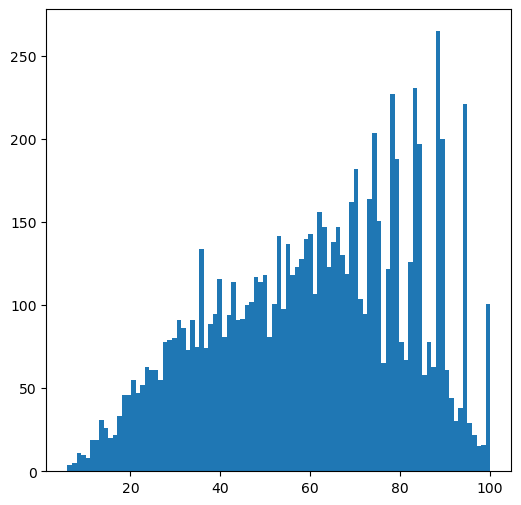

In [ ]:
_, ax = plt.subplots(figsize=(6, 6))

ax.hist(df_apt['Relative Humidity'],bins=93)

plt.show()


In [ ]:
def label_humidity(humidity):
    if humidity < 30: 
        return 'Uncomfortable Dry' # 0
    elif humidity > 60:
        return 'Uncomfortable Wet' # 2
    else:
        return 'Comfort' # 1

In [ ]:
df_apt

,season,0,1,2,3,month,day,hour,day period,Drybulb Temperature,Wetbulb Temperature,Wetbulb Depression,Relative Humidity,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand
0,Winter,0.0,0.0,0.0,1.0,1,1,1,0,16.0,13.705041,2.294959,78,0.5,190,0,0.0,15711.87874,2564.336701
1,Winter,0.0,0.0,0.0,1.0,1,1,2,0,15.6,13.758291,1.841709,82,2.1,120,0,0.0,15123.15413,1954.418025
2,Winter,0.0,0.0,0.0,1.0,1,1,3,0,15.1,13.595604,1.504396,85,2.1,120,0,0.0,14828.79182,1600.689937
3,Winter,0.0,0.0,0.0,1.0,1,1,4,0,14.8,13.512457,1.287543,87,2.1,140,0,0.0,14681.61067,1385.728476
4,Winter,0.0,0.0,0.0,1.0,1,1,5,0,14.4,13.227824,1.172176,88,1.0,150,0,0.0,16758.10411,1245.539726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Winter,0.0,0.0,0.0,1.0,12,31,20,5,17.9,14.182659,3.717341,67,3.6,290,0,0.0,38150.57785,5645.494442
8756,Winter,0.0,0.0,0.0,1.0,12,31,21,5,17.5,14.062586,3.437414,69,3.1,270,0,0.0,37710.45695,5061.279263
8757,Winter,0.0,0.0,0.0,1.0,12,31,22,5,17.2,14.025331,3.174669,71,2.6,260,0,0.0,32246.95593,4435.611816
8758,Winter,0.0,0.0,0.0,1.0,12,31,23,5,16.8,13.889234,2.910766,73,3.1,260,0,0.0,25311.64337,3394.955401


In [ ]:
df_apt['Humidity range'] = df_apt['Relative Humidity'].apply(label_humidity)

In [ ]:
df_humidity_cat_apt = df_apt[['Humidity range']]

In [ ]:
df_humidity_cat_apt


,Humidity range
0,Uncomfortable Wet
1,Uncomfortable Wet
2,Uncomfortable Wet
3,Uncomfortable Wet
4,Uncomfortable Wet
...,...
8755,Uncomfortable Wet
8756,Uncomfortable Wet
8757,Uncomfortable Wet
8758,Uncomfortable Wet


In [ ]:
df_humidity_cat_1hot_Apt = cat_encoder.fit_transform(df_humidity_cat_apt)


In [ ]:
df_humidity_cat_1hot_Apt = pd.DataFrame(df_humidity_cat_1hot_Apt.toarray()
)

In [ ]:
df_humidity_cat_1hot_Apt

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
8755,0.0,0.0,1.0
8756,0.0,0.0,1.0
8757,0.0,0.0,1.0
8758,0.0,0.0,1.0


In [ ]:
df_apt = pd.concat([df_apt,df_humidity_cat_1hot_Apt],axis=1)

In [ ]:
df_apt

,season,0,1,2,3,month,day,hour,day period,Drybulb Temperature,...,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand,Humidity range,0,1,2
0,Winter,0.0,0.0,0.0,1.0,1,1,1,0,16.0,...,0.5,190,0,0.0,15711.87874,2564.336701,Uncomfortable Wet,0.0,0.0,1.0
1,Winter,0.0,0.0,0.0,1.0,1,1,2,0,15.6,...,2.1,120,0,0.0,15123.15413,1954.418025,Uncomfortable Wet,0.0,0.0,1.0
2,Winter,0.0,0.0,0.0,1.0,1,1,3,0,15.1,...,2.1,120,0,0.0,14828.79182,1600.689937,Uncomfortable Wet,0.0,0.0,1.0
3,Winter,0.0,0.0,0.0,1.0,1,1,4,0,14.8,...,2.1,140,0,0.0,14681.61067,1385.728476,Uncomfortable Wet,0.0,0.0,1.0
4,Winter,0.0,0.0,0.0,1.0,1,1,5,0,14.4,...,1.0,150,0,0.0,16758.10411,1245.539726,Uncomfortable Wet,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Winter,0.0,0.0,0.0,1.0,12,31,20,5,17.9,...,3.6,290,0,0.0,38150.57785,5645.494442,Uncomfortable Wet,0.0,0.0,1.0
8756,Winter,0.0,0.0,0.0,1.0,12,31,21,5,17.5,...,3.1,270,0,0.0,37710.45695,5061.279263,Uncomfortable Wet,0.0,0.0,1.0
8757,Winter,0.0,0.0,0.0,1.0,12,31,22,5,17.2,...,2.6,260,0,0.0,32246.95593,4435.611816,Uncomfortable Wet,0.0,0.0,1.0
8758,Winter,0.0,0.0,0.0,1.0,12,31,23,5,16.8,...,3.1,260,0,0.0,25311.64337,3394.955401,Uncomfortable Wet,0.0,0.0,1.0


In [ ]:
df_apt.iloc[:,19:].head()

,Humidity range,0,1,2
0,Uncomfortable Wet,0.0,0.0,1.0
1,Uncomfortable Wet,0.0,0.0,1.0
2,Uncomfortable Wet,0.0,0.0,1.0
3,Uncomfortable Wet,0.0,0.0,1.0
4,Uncomfortable Wet,0.0,0.0,1.0


In [ ]:
df_apt.columns

Index([               'season',                       0,
                             1,                       2,
                             3,                 'month',
                         'day',                  'hour',
                  'day period',   'Drybulb Temperature',
         'Wetbulb Temperature',    'Wetbulb Depression',
           'Relative Humidity',            'Wind Speed',
              'Wind Direction',       'Solar Radiation',
               'Sky Clearness', 'Total Electric Demand',
        'HVAC Electric Demand',        'Humidity range',
                             0,                       1,
                             2],
      dtype='object')

In [ ]:
cols = ['season',                       'Spring',
        'Summer',                       'Fall', 'Winter',             'month',
        'day',                  'hour',
        'day period',   'Drybulb Temperature',
        'Wetbulb Temperature',    'Wetbulb Depression',
        'Relative Humidity',            'Wind Speed',
        'Wind Direction',       'Solar Radiation',
        'Sky Clearness', 'Total Electric Demand',
        'HVAC Electric Demand',        'Humidity range',
        'Comfort','Uncomfortable Dry', 
        'Uncomfortable Wet']


In [ ]:
df_apt.columns = cols

In [ ]:
cols = ['season',
        'Spring',
        'Summer',
        'Fall',
        'Winter',
        'month',
        'day',
        'hour',
        'day period',
        'Drybulb Temperature',
        'Wetbulb Temperature',
        'Wetbulb Depression',
        'Relative Humidity',
        'Humidity range',
        'Comfort',
        'Uncomfortable Dry',
        'Uncomfortable Wet',
        'Wind Speed',
        'Wind Direction',
        'Solar Radiation',
        'Sky Clearness',
        'Total Electric Demand',
        'HVAC Electric Demand'
        ]


In [ ]:
df_apt = df_apt.reindex(columns=cols)

### 8- Repeat question 6 with the new dataset for both buildings and report any improvement you see in training and test MSE values.


In [ ]:
data = df_apt[df_apt.describe().T.index]


In [ ]:
apt_train_set, apt_test_set = train_test_split(
    data, test_size=0.2, random_state=42)


In [ ]:
apt_train_set


,Spring,Summer,Fall,Winter,month,day,hour,day period,Drybulb Temperature,Wetbulb Temperature,...,Relative Humidity,Comfort,Uncomfortable Dry,Uncomfortable Wet,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand
8415,0.0,0.0,0.0,1.0,12,17,16,3,27.0,15.809509,...,30,1.0,0.0,0.0,1.5,190,712,4.437012,16820.96247,11701.926620
5049,0.0,0.0,1.0,0.0,7,30,10,2,39.2,22.344758,...,23,0.0,1.0,0.0,4.1,150,624,3.077119,16044.67763,30615.279060
8395,0.0,0.0,0.0,1.0,12,16,20,5,19.0,16.497794,...,78,0.0,0.0,1.0,2.1,60,0,0.000000,38150.57785,7532.528875
1535,0.0,1.0,0.0,0.0,3,5,0,0,17.3,16.022137,...,88,0.0,0.0,1.0,6.5,80,0,0.000000,19415.13430,2164.094159
5518,0.0,0.0,1.0,0.0,8,18,23,5,31.0,28.645840,...,84,0.0,0.0,1.0,2.1,60,0,0.000000,19415.13430,29339.250350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,1.0,0.0,8,27,23,5,34.0,25.883462,...,53,1.0,0.0,0.0,3.6,30,0,0.000000,19415.13430,30349.611230
5191,0.0,0.0,1.0,0.0,8,5,8,1,36.0,22.918571,...,33,1.0,0.0,0.0,2.1,60,250,1.636380,21784.93617,26691.115130
5390,0.0,0.0,1.0,0.0,8,13,15,3,37.0,27.750904,...,50,1.0,0.0,0.0,7.2,320,796,5.553459,16820.96247,34852.133130
860,0.0,0.0,0.0,1.0,2,5,21,5,19.0,17.088223,...,83,0.0,0.0,1.0,2.6,320,0,0.000000,37710.45695,8301.146763


#### Repeat 6 LinR


In [ ]:
y = apt_train_set.pop('HVAC Electric Demand')
X = apt_train_set


In [ ]:
scaler = StandardScaler()


In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-0.57735027, -0.58152447, -0.58196387, ...,  1.30081093,
         1.08809622, -0.7644247 ],
       [-0.57735027, -0.58152447,  1.71831972, ...,  1.04524704,
         0.5198727 , -0.87103494],
       [-0.57735027, -0.58152447, -0.58196387, ..., -0.76693327,
        -0.76588453,  2.16485487],
       ...,
       [-0.57735027, -0.58152447,  1.71831972, ...,  1.54475828,
         1.55459752, -0.7644247 ],
       [-0.57735027, -0.58152447, -0.58196387, ..., -0.76693327,
        -0.76588453,  2.10441135],
       [ 1.73205081, -0.58152447, -0.58196387, ..., -0.76693327,
        -0.76588453, -0.40815693]])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_scaled,y)

LinearRegression()

In [ ]:
y_predicted = lin_reg.predict(X_scaled)
lin_mse = mean_squared_error(y, y_predicted)
lin_rmse = np.sqrt(lin_mse)


In [ ]:
lin_mse


5192755.370297434

In [ ]:
lin_rmse


2278.7618063978152

In [ ]:
y_test = apt_test_set.pop('HVAC Electric Demand')
X_test = apt_test_set


In [ ]:
X_test_scale = scaler.transform(X_test)
y_predicted_test = lin_reg.predict(X_test_scale)
lin_mse_test = mean_squared_error(y_test, y_predicted_test)
lin_rmse_test = np.sqrt(lin_mse_test)


In [ ]:
lin_rmse_test


2257.3427203424967

In [ ]:
data.columns

Index(['Spring', 'Summer', 'Fall', 'Winter', 'month', 'day', 'hour',
       'day period', 'Drybulb Temperature', 'Wetbulb Temperature',
       'Wetbulb Depression', 'Relative Humidity', 'Comfort',
       'Uncomfortable Dry', 'Uncomfortable Wet', 'Wind Speed',
       'Wind Direction', 'Solar Radiation', 'Sky Clearness',
       'Total Electric Demand', 'HVAC Electric Demand'],
      dtype='object')

In [ ]:
corr_matrix_HVAC_apt = data[['Spring', 'Summer', 'Fall', 'Winter',
                             'day period', 'Drybulb Temperature', 'Wetbulb Temperature',
                             'Wetbulb Depression', 'Comfort',
                             'Uncomfortable Dry', 'Uncomfortable Wet', 'Wind Speed',
                             'Wind Direction', 'Solar Radiation', 'Sky Clearness', 'HVAC Electric Demand']].corr()


In [ ]:
# corr_matrix_HVAC_apt[abs(corr_matrix_HVAC_apt) > 0.5]

In [ ]:
corr_matrix_05 = corr_matrix_HVAC_apt[(abs(corr_matrix_HVAC_apt) > 0.5) & (corr_matrix_HVAC_apt !=1)].dropna(how="all")

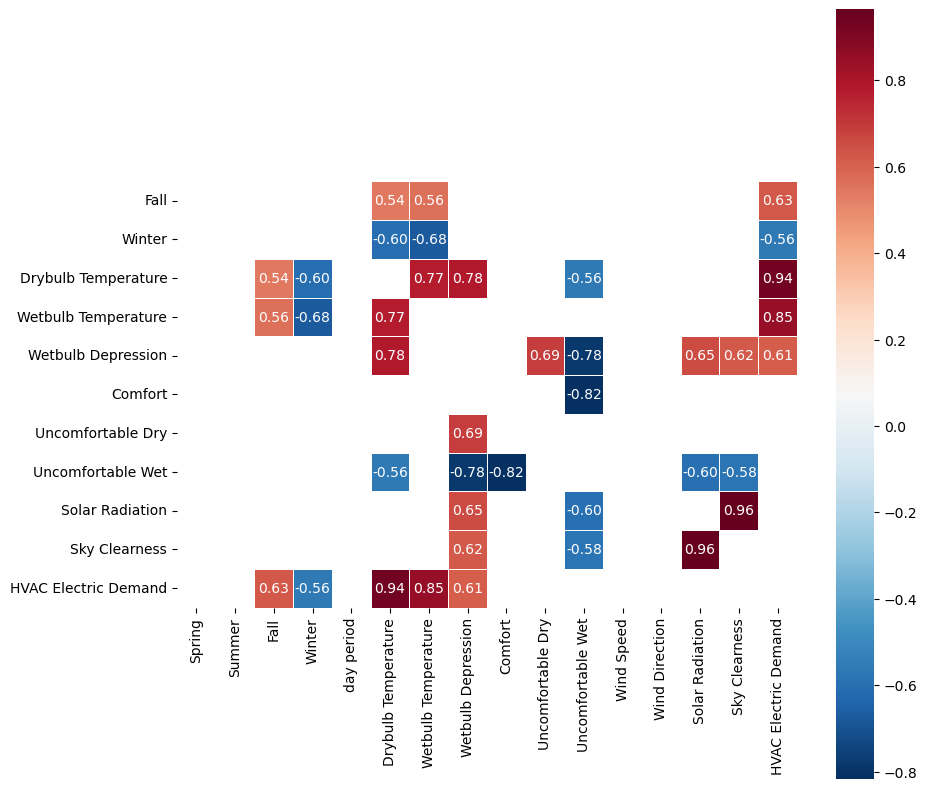

In [ ]:
# filter the correlation matrix with threshold

_, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr_matrix_05,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax)

plt.show()


### 9- Explain what regularization is in supervised learning and repeat step 8 using sklearn Ridge and Lasso classes based on the below instruction:

- ### Use Ridge report and plot test MSE for alpha={0, 0.005, 0.05,0.1,1}
- ### Use Lasso report and plot test MSE for alpha={0, 0.005, 0.05,0.1,1}.


In [ ]:
data

,Spring,Summer,Fall,Winter,month,day,hour,day period,Drybulb Temperature,Wetbulb Temperature,...,Relative Humidity,Comfort,Uncomfortable Dry,Uncomfortable Wet,Wind Speed,Wind Direction,Solar Radiation,Sky Clearness,Total Electric Demand,HVAC Electric Demand
0,0.0,0.0,0.0,1.0,1,1,1,0,16.0,13.705041,...,78,0.0,0.0,1.0,0.5,190,0,0.0,15711.87874,2564.336701
1,0.0,0.0,0.0,1.0,1,1,2,0,15.6,13.758291,...,82,0.0,0.0,1.0,2.1,120,0,0.0,15123.15413,1954.418025
2,0.0,0.0,0.0,1.0,1,1,3,0,15.1,13.595604,...,85,0.0,0.0,1.0,2.1,120,0,0.0,14828.79182,1600.689937
3,0.0,0.0,0.0,1.0,1,1,4,0,14.8,13.512457,...,87,0.0,0.0,1.0,2.1,140,0,0.0,14681.61067,1385.728476
4,0.0,0.0,0.0,1.0,1,1,5,0,14.4,13.227824,...,88,0.0,0.0,1.0,1.0,150,0,0.0,16758.10411,1245.539726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,0.0,1.0,12,31,20,5,17.9,14.182659,...,67,0.0,0.0,1.0,3.6,290,0,0.0,38150.57785,5645.494442
8756,0.0,0.0,0.0,1.0,12,31,21,5,17.5,14.062586,...,69,0.0,0.0,1.0,3.1,270,0,0.0,37710.45695,5061.279263
8757,0.0,0.0,0.0,1.0,12,31,22,5,17.2,14.025331,...,71,0.0,0.0,1.0,2.6,260,0,0.0,32246.95593,4435.611816
8758,0.0,0.0,0.0,1.0,12,31,23,5,16.8,13.889234,...,73,0.0,0.0,1.0,3.1,260,0,0.0,25311.64337,3394.955401


In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
apt_train_set, apt_test_set = train_test_split(
    data, test_size=0.2, random_state=42)


In [ ]:
# alphas = [0,0.005,0.05,0.1,1] ## Original
# alphas = [0.5,1,3,5,10,15,20]
alphas = [0.1 ** _ for _ in [0, 1, 2, 3, 4, 5, 6]]

#### Ridge Regularization


In [ ]:
ridge_mse_train_ls = []
ridge_mse_test_ls = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_scaled, y)
    y_predicted = ridge_reg.predict(X_scaled)
    ridge_mse_train_ls.append(mean_squared_error(y, y_predicted))
    y_predicted_test = ridge_reg.predict(X_test_scale)
    ridge_mse_test_ls.append(mean_squared_error(y_test, y_predicted_test))
  


#### Lasso Regularization


In [ ]:
lasso_mse_train_ls = []
lasso_mse_test_ls = []

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_scaled, y)
    y_predicted = lasso_reg.predict(X_scaled)
    lasso_mse_train_ls.append(mean_squared_error(y, y_predicted))
    y_predicted_test = lasso_reg.predict(X_test_scale)
    lasso_mse_test_ls.append(mean_squared_error(y_test, y_predicted_test))



/Users/sagawithme/.conda/envs/p39/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e+08, tolerance: 8.704e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sagawithme/.conda/envs/p39/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.961e+08, tolerance: 8.704e+07
  model = cd_fast.enet_coordinate_descent(


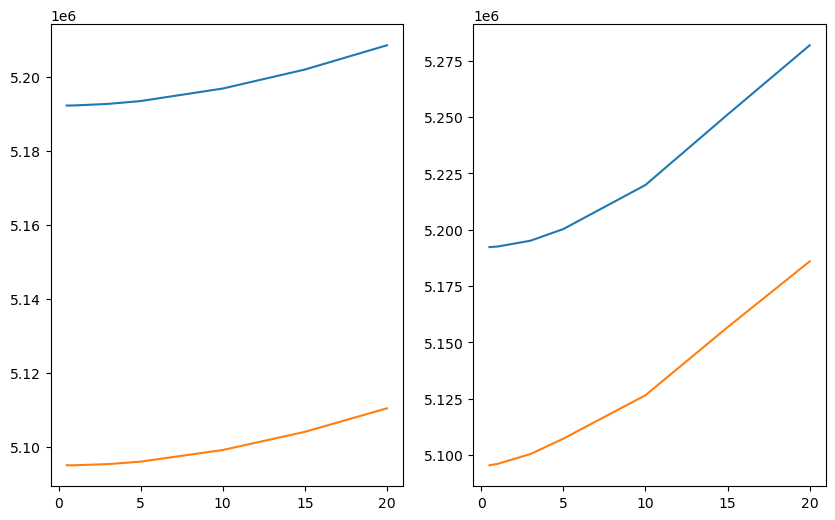

In [ ]:
_, axes = plt.subplots(1,2,figsize=(10, 6))

axes[0].plot(alphas, ridge_mse_train_ls)
axes[0].plot(alphas, ridge_mse_test_ls)
axes[1].plot(alphas, lasso_mse_train_ls)
axes[1].plot(alphas, lasso_mse_test_ls)

plt.show()


In [ ]:
ridge_reg.coef_

array([  -75.10249111, -1001.96627615,   851.39784242,   227.6513074 ,
        -352.44360894,  -172.92388489,  -789.05663229,  1507.15399193,
        5623.70849247,  3858.82970421,  4873.16522701,  3636.20283506,
         295.4490216 ,  -362.92619239,   -72.83850148,   165.63828866,
         174.79543544,   182.33217574,  -310.88687647,  1034.7830359 ])

In [ ]:
lasso_reg.coef_

array([ -157.94676092, -1075.77491734,   762.76646489,   122.40518309,
        -334.92772805,  -153.00352665,    -0.        ,   713.36045741,
       11805.08343833,     0.        ,   299.33787545,  3102.20097006,
         307.84972015,  -252.76888604,    -0.        ,   136.0434577 ,
         160.70778216,    -0.        ,  -125.92997354,  1031.97004204])

### 10- Use the following sklearn regressors and compare the training and test MSE values and report the model with the best generalization (do not change the default values for these objects):

- #### AdaBoostRegressor
- #### BaggingRegressor
- #### SVR
- #### RandomForestRegressor


### AdaBoostRegressor


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=10,random_state=42)
ada = AdaBoostRegressor(tree, n_estimators=1000, random_state=42)

In [ ]:
ada.fit(X,y) # no standard scaler

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  n_estimators=1000, random_state=42)

In [ ]:
y_predicted = ada.predict(X)
ada_mse_train = mean_squared_error(y,y_predicted)

In [ ]:
ada_mse_train


125491.24564039412

In [ ]:
y_predicted_test = ada.predict(X_test)
ada_mse_test = mean_squared_error(y_test,y_predicted_test)

In [ ]:
ada_mse_test

843561.5000799475

### BaggingRegressor


In [ ]:
from sklearn.ensemble import BaggingRegressor


In [ ]:
tree = DecisionTreeRegressor(max_depth=20,random_state=42)
bagging = BaggingRegressor(tree, n_estimators=500, max_samples=100,
                            bootstrap=True, random_state=42)

In [ ]:
tree.fit(X, y)
bagging.fit(X, y)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20, random_state=42),
                 max_samples=100, n_estimators=500, random_state=42)

In [ ]:
y_predicted = bagging.predict(X)
bagging_mse_train = mean_squared_error(y,y_predicted)

In [ ]:
bagging_mse_train


3161945.5506378855

In [ ]:
y_predicted_test = bagging.predict(X_test)
bagging_mse_test = mean_squared_error(y_test,y_predicted_test)

In [ ]:
bagging_mse_test


3399444.4965372

### SVR

- standardized


In [ ]:
from sklearn.svm import SVR


In [ ]:
SVR_model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)


In [ ]:
SVR_model.fit(X_scaled,y)

SVR(C=10, gamma=0.1)

In [ ]:
y_predicted = SVR_model.predict(X_scaled)
svr_mse_train = mean_squared_error(y, y_predicted)


In [ ]:
svr_mse_train


88797992.09616236

In [ ]:
y_predicted_test = SVR_model.predict(X_test_scale)
svr_mse_test = mean_squared_error(y_test, y_predicted_test)



In [ ]:
svr_mse_test


90744494.96216199

In [ ]:
from sklearn.model_selection import GridSearchCV # Try more


In [ ]:
# # SVR 的各个参数可以通过调整来优化模型性能。下面介绍一些常用的参数及其调整方法：

# # kernel：核函数。SVR 支持多种不同的核函数，包括线性核函数、多项式核函数、径向基函数（RBF）核函数等。不同的核函数对应不同的模型复杂度和性能表现。可以通过交叉验证或网格搜索来确定最佳的核函数。

# # C：惩罚系数。C 控制着模型的复杂度和泛化能力，较小的 C 值会导致较大的间隔，较大的 C 值会导致更少的支持向量。可以通过交叉验证或网格搜索来确定最佳的 C 值。

# # gamma：核函数的系数。gamma 控制着核函数的宽度，较小的 gamma 值会导致核函数更宽，较大的 gamma 值会导致核函数更窄。可以通过交叉验证或网格搜索来确定最佳的 gamma 值。

# # epsilon：对于不同的损失函数，epsilon 有不同的含义。在 SVR 中，epsilon 是一个控制支持向量的边界的参数，较小的 epsilon 值会导致更多的支持向量，较大的 epsilon 值会导致更少的支持向量。可以通过交叉验证或网格搜索来确定最佳的 epsilon 值。



# # from sklearn.svm import SVR
# # from sklearn.model_selection import GridSearchCV
# # from sklearn.datasets import load_boston
# # from sklearn.preprocessing import StandardScaler

# # 加载波士顿房价数据集
# boston = load_boston()

# # 对数据进行标准化处理
# scaler = StandardScaler()
# X = scaler.fit_transform(boston.data)
# y = boston.target

# # 定义参数搜索范围
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'gamma': [0.1, 1, 10],
#     'epsilon': [0.1, 0.2, 0.5]
# }

# # 创建 SVR 模型并进行网格搜索
# model = SVR()
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # 输出最佳参数和最佳评分
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", -grid_search.best_score_)

### RandomForestRegressor

- No standardized


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF_reg = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)


In [ ]:
RF_reg.fit(X,y)

RandomForestRegressor(max_depth=8, random_state=42)

In [ ]:
y_predicted = RF_reg.predict(X)
RFR_mse_train = mean_squared_error(y,y_predicted)

In [ ]:
RFR_mse_train

850689.0819968543

In [ ]:
y_predicted_test = RF_reg.predict(X_test)
RFR_mse_test = mean_squared_error(y_test,y_predicted_test)

In [ ]:
RFR_mse_test


1359783.412459355